<a href="https://colab.research.google.com/github/Gizem-kaya/Image-Processing-with-Python/blob/master/Advanced_Operations_Detecting_Faces_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advanced Operations, Detecting Faces and Features**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import canny
from skimage import color, data
from skimage.feature import corner_harris, corner_peaks
from skimage.feature import Cascade
import matplotlib.patches as patches
from skimage.segmentation import slic
from skimage.filters import gaussian

In [2]:
def show_comparison(original, title, filtered, new_title):
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,12), sharex = True, sharey = True )

  ax1.imshow(original, cmap = plt.cm.gray)
  ax1.set_title(title)
  ax1.axis('off')

  ax2.imshow(filtered, cmap = plt.cm.gray)
  ax2.set_title(new_title)
  ax2.axis('off')

  plt.show()

In [3]:
def show_corners(image, coordinates, title):
  plt.figure(figsize=(8,6))
  plt.imshow(image, interpolation = 'nearest', cmap = 'gray')
  plt.title(title)
  plt.plot(coordinates[:, 1], coordinates[:, 0], '+r', markersize = 15)
  plt.axis('off')
  plt.show()

In [4]:
def show_face(image, detection, title):
  plt.imshow(image)
  img_desc = plt.gca()
  plt.set_cmap('gray')
  plt.axis('off')
  plt.title(title)

  for patch in detection:
    img_desc.add_patch(patches.Rectangle(
        (patch['c'], patch['r']), patch['width'], patch['height'], fill = False, color = 'r',linewidth = 2)
    )
  plt.show()

In [5]:
def get_face(d, image):
  x,y = d['r'], d['c']

  width = d['r'] + d['width']
  height = d['c'] + d['height']

  face = image[x:width, y:height]
  return face

In [6]:
def merge_face(d, original_image, gaussian_image):
  x,y = d['r'], d['c']

  width = d['r'] + d['width']
  height = d['c'] + d['height']

  original_image[x:width, y:height] = gaussian_image
  return original_image

## **Finding the edges with Canny**

In [7]:
fruits = plt.imread("edge_detection.jpg")

gray_fruits = color.rgb2gray(fruits)

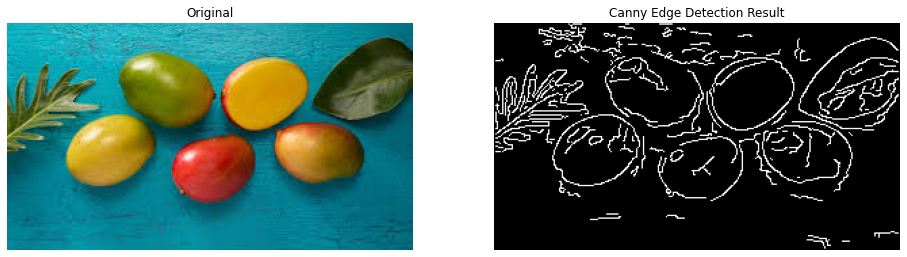

In [8]:
edges = canny(gray_fruits, sigma = 1.0)  # Second parameter is the gaussian filter(is already 1 as default). 
 
show_comparison(fruits, "Original", edges, "Canny Edge Detection Result")

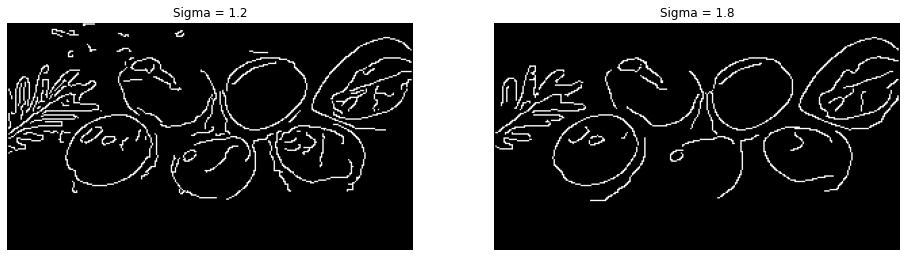

In [9]:
edges_18 = canny(gray_fruits, sigma = 1.8)  
edges_12 = canny(gray_fruits, sigma = 1.2)  

show_comparison(edges_12, "Sigma = 1.2", edges_18, "Sigma = 1.8")

## **Right around the corner**

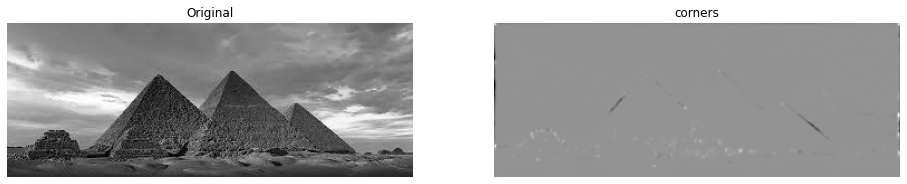

In [10]:
building = plt.imread('building.jpg')
building = color.rgb2gray(building)

measures = corner_harris(building)

show_comparison(building,'Original', measures, 'corners')

With a min_distance set to 2, we detect a total 35 corners in the image.


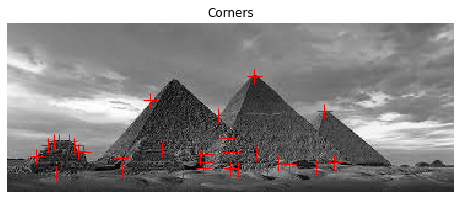

In [11]:
corner_coordinates = corner_peaks(measures, min_distance = 2)

print("With a min_distance set to 2, we detect a total", len(corner_coordinates), "corners in the image.")

show_corners(building, corner_coordinates, 'Corners')

## **Face detection**

In [12]:
face = plt.imread('face.jpg')

In [13]:
trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)

In [14]:
detection = detector.detect_multi_scale(img = face, 
                                        scale_factor = 1.2 ,
                                        step_ratio = 0.8,
                                        min_size = (10,10), 
                                        max_size = (500,500)
                                        )

* scale_factor, which the searching window is multiplied in each step
* step_ratio, higher values means the computation will be fast but the results will be worse
* min_size and max_size, size intervals for the search windows

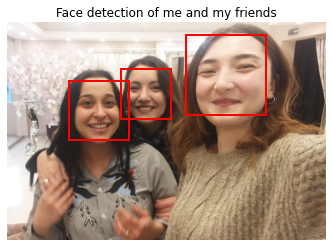

In [15]:
show_face(face, detection, 'Face detection of me and my friends')

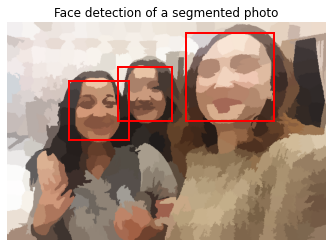

In [16]:
segments = slic(face, n_segments= 400)

segmented_image = color.label2rgb(segments, face, kind='avg')

detection_seg = detector.detect_multi_scale(img = segmented_image, 
                                        scale_factor = 1.2 ,
                                        step_ratio = 0.8,
                                        min_size = (10,10), 
                                        max_size = (500,500)
                                        )
show_face(segmented_image, detection_seg, 'Face detection of a segmented photo')

## **Real-world applications**

### **Privacy Protection**

In [17]:
faces = plt.imread('faces.jpeg')

detection = detector.detect_multi_scale(img = faces, 
                                        scale_factor = 1.2 ,
                                        step_ratio = 0.8,
                                        min_size = (100,100), 
                                        max_size = (300,300)
                                        )


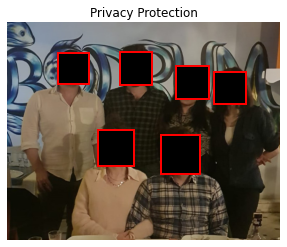

In [18]:
cfaces = faces.copy()

for d in detection :
  face = get_face(d, faces)
  gaussian_face = gaussian(face, multichannel= True, sigma= 10)
  resulting_image = merge_face(d, cfaces, gaussian_face)

show_face(resulting_image, detection, 'Privacy Protection')